In [1]:
import math

In [2]:
def EucDist(v1, v2):
  sm = 0
  for i in range (len(v1)):
    sm += (v1[i]-v2[i])**2
  return math.sqrt(sm)

In [3]:
v1 = [1.2, 2.0, 3.8, 4.0]
v2 = [0.5, 4.5, 5.3, 1.2]

In [4]:
EucDist(v1, v2)

4.102438299353203

In [59]:
# Loading the dataset
dataset = []

with open('./haberman+s+survival/haberman.data', 'r') as data:
  for line in data.readlines():
    attrib = line.replace('\n', ' ').split(',')
    attrib = [int(i) for i in attrib]
    dataset.append(attrib)

In [60]:
print(len(dataset))
print(dataset[:4])
print(dataset[-4:])

306
[[30, 64, 1, 1], [30, 62, 3, 1], [30, 65, 0, 1], [31, 59, 2, 1]]
[[76, 67, 0, 1], [77, 65, 3, 1], [78, 65, 1, 2], [83, 58, 2, 2]]


In [61]:
def info_dataset(data):
    label1, label2 = 0, 0
    for sample in data:
        if sample[-1] == 1:
            label1 += 1
        else:
            label2 += 1

    return [len(data), label1, label2]

In [62]:
info_dataset(dataset)

[306, 225, 81]

In [63]:
#splitting the data

p=0.6

total, label1, label2 = info_dataset(dataset)

In [64]:
train = []
test = []

for i in range(len(dataset)):
    if i <p*total:
        train.append(dataset[i])
    else:
        test.append(dataset[i])

In [65]:
info_dataset(train)

[184, 133, 51]

In [66]:
info_dataset(test)

[122, 92, 30]

In [68]:
#Implementing KNN

def knn(train, newsample, k):
    dist = {}
    trainsize = len(train)

    for i in range(trainsize):
        d = EucDist(train[i][:-1], newsample)
        dist[i] = d

    KNearest = sorted(dist, key=dist.get)[:k]
    nlabel1, nlabel2 = 0, 0

    for ind in KNearest: #4,7,2
        if train[ind][-1] == 1:
            nlabel1 += 1
        else:
            nlabel2 += 1
    
    if (nlabel1 > nlabel2):
        return 1
    else:
        return 2
    

In [69]:
newSample = dataset[52]
k=7
print(newSample)
knn(train, newSample, k)

[41, 65, 0, 1]


1

In [70]:
k =13
hits = 0

for sample in test:
    sampleClass = knn(train, sample, k)
    if (sample[-1]) == sampleClass:
        hits += 1

print("Total training: %d"%len(train))
print("Total test: %d"%len(test))

print("Corrects: %.2f%%"%(100*hits/len(test)))
print("Accurancy: %.2f"%(hits/len(test)))


Total training: 184
Total test: 122
Corrects: 75.41%
Accurancy: 0.75


In [76]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


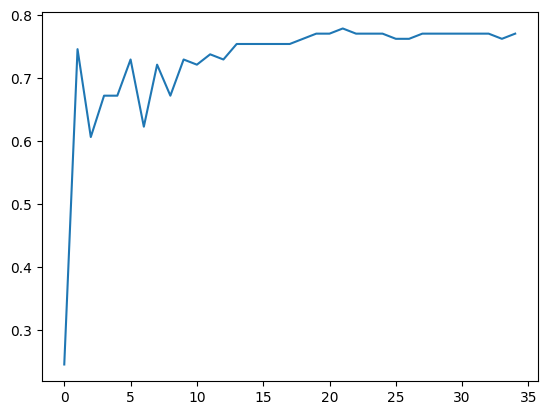

In [77]:
arr = []
maxk = 35
for k in range(maxk):
    hits = 0
    for sample in test:
        sampleClass = knn(train, sample, k)
        if (sample[-1]) == sampleClass:
            hits += 1
    arr.append(hits/len(test))

import matplotlib.pyplot as plt
plt.plot(arr)

In [79]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=31)


In [81]:
import numpy as np
newdataset = np.array(dataset)
x = newdataset[:,:-1]
y = newdataset[:,-1]

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.6)

In [83]:
knn.fit(X_train, y_train)   

KNeighborsClassifier(n_neighbors=31)

In [84]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]


In [85]:
print("Test set score: %.2f"%(np.mean(y_pred == y_test)))

Test set score: 0.74
